# Minimiser le temps de réalisation d'un projet

Objectif : Minimiser le temps total d'exécution d'un projet. ( Makespan)

Source : Optimisations avec Excel de Eyrolles, de Christian Prins et Marc Sevaux.

Recréation du problème de Excel à python MIP  par estelle derrien et vérification si les résultats sont identiques.

Lien : 
https://docs.python-mip.com/en/latest/examples.html

Note: le code Python MIP exemple comprends des contraintes en ressources ( C'est un RCPSP). Elles ne sont pas dans l'optimisation de Christian Prins, du coup, il va falloir tenter de les enlever du code Python.

CREATION EN COURS !!!!

Voici les tâches que Christian Prins avait créé dans son livre:

<img src ="img/taches.jpg">

Voici maintenant l'exemple donné sur le site de Python Mip (Brasil), 
On voit que cela ressemble dans l'esprit : 

<img src = "img/python-mip.png">

## La modélisation mathématique : 

Celle du livre :
<img src = "img/model1.jpg">

Celle de Python Mip (Avec les contraintes de ressource en plus !): 
<img src = "img/model2.png">

In [177]:
# n = Nombre de tâches plus 1 ( Celle de début et celle de fin 'fictives' mais nécessaires, celle de fin est déjà présente dans le fichier excel)
# p = Durée de chaque tâches
# u = Ressources nécessaires, dans ce problème il n'y en pas besoin.
# S = Successeurs

from itertools import product
from mip import Model, xsum, BINARY

# On tente désormais de recréer le problème Excel sous Python :

# note there will be exactly 20 jobs (n=18 jobs plus the  2 'dummy' one)
n = 18

# Durée Taches du pb initial de Python Mip il y en a 10 plus 2 fictives
# p = [0, 3, 2, 5, 4, 2, 3, 4, 2, 4, 6, 0]

# Là , J'ajoute la durée des tâches comme dans le problème Excel de Christian Prins
p = [0, 2, 16, 9, 8, 10, 6, 2, 2, 9, 5, 3, 2, 1,
     7, 4, 3, 9, 1, 0]  # J'ai rajouté la tâche dummy au début et à la fin " fin des travaux d'une durée de 0"

# Dans ce problème, il n'y a pas de contraintes de ressources, on les commente donc.
# quantité de ressource r requise pour le traitement de la tâche j
# u = [[0, 0], [5, 1], [0, 4], [1, 4], [1, 3], [3, 2], [3, 1], [2, 4],
#      [4, 0], [5, 2], [2, 5], [0, 0]]

# Capacité de ressource renouvelable r (?)
# c = [6, 8]

# Ici on voit les successeurs du problème Python MIP, on comprends bien à l'aide du graphe des successeurs.
# S = [[0, 1], [0, 2], [0, 3], [1, 4], [1, 5], [2, 9], [2, 10], [3, 8], [4, 6],
#     [4, 7], [5, 9], [5, 10], [6, 8], [6, 9], [7, 8], [8, 11], [9, 11], [10, 11]] # successeurs des nodes [node, successeur]

# On récrée donc les successeurs de l'exercice de Christian Prins, à la manière de Python Mip:
S = [[0, 1],  [1, 2], [2, 3], [2, 4], [2, 14], [3, 5], [4, 6], [4, 7], [4, 9], [4, 10], [4, 15],[5,6],
     [6, 8], [6, 9], [6, 11], [6, 11], [7, 13], [8, 16], [9, 12], [11, 16], [12, 17], [14, 15], [14, 16], [17, 18], [18, 19]]

# successeurs des nodes [node, successeur] , On enlève les ressources parce qu'il n'y en a pas dans ce problème.
# (R, J, T) = (range(len(c)), range(len(p)), range(sum(p)))
(J, T) = (range(len(p)), range(sum(p)))

model = Model()

x = [[model.add_var(name="x({},{})".format(j, t), var_type=BINARY)
      for t in T] for j in J]

model.objective = xsum(t * x[n + 1][t] for t in T)

for j in J:
    model += xsum(x[j][t] for t in T) == 1

# Ce code concerne les ressources, il est inutile dans ce cas.
# for (r, t) in product(R, T):
#     model += (
#         xsum(u[j][r] * x[j][t2] for j in J for t2 in range(max(0, t - p[j] + 1), t + 1))
#         <= c[r])

for (j, s) in S:
    model += xsum(t * x[s][t] - t * x[j][t] for t in T) >= p[j]




Maintenant, on va calculer la solution et voir si on trouve comme dans le livre Programmation linéaire 
de Christian Prins et Marc Sevaux :


In [178]:
model.optimize()

print("Schedule: ")
for (j, t) in product(J, T):
    if x[j][t].x >= 0.99:
        print("Job {}: begins at t={} and finishes at t={}".format(
            j, t, t+p[j]))
print("Makespan = {}".format(model.objective_value))

Schedule: 
Job 0: begins at t=0 and finishes at t=0
Job 1: begins at t=0 and finishes at t=2
Job 2: begins at t=2 and finishes at t=18
Job 3: begins at t=18 and finishes at t=27
Job 4: begins at t=19 and finishes at t=27
Job 5: begins at t=27 and finishes at t=37
Job 6: begins at t=37 and finishes at t=43
Job 7: begins at t=43 and finishes at t=45
Job 8: begins at t=87 and finishes at t=89
Job 9: begins at t=43 and finishes at t=52
Job 10: begins at t=45 and finishes at t=50
Job 11: begins at t=45 and finishes at t=48
Job 12: begins at t=52 and finishes at t=54
Job 13: begins at t=93 and finishes at t=94
Job 14: begins at t=24 and finishes at t=31
Job 15: begins at t=43 and finishes at t=47
Job 16: begins at t=98 and finishes at t=101
Job 17: begins at t=54 and finishes at t=63
Job 18: begins at t=63 and finishes at t=64
Job 19: begins at t=64 and finishes at t=64
Makespan = 64.0


Hourra ! Le résultat est identique à Excel !
<img src = "img/resultat.jpg">


Vérifions si les temps de départ et de fin des tâches sont identiques ...
En vert, on a les débuts et fins de tâches calculées par le solveur Excel , on voit que celles de Python Mip sont différentes, mais le MakeSpan (Temps total du projet) est identique .

<img src ="img/taches.jpg">

Voyons si on peut tracer le graphe des tâches et des arrêtes avec python, afin de mieux visualiser la différence. Dans la mesure ou le Makespan est OK, il n'y a pas de problèmes à ce que les débuts et fins de tâches calculées par le solveur Python Mip divergent de celles calculées par le Solveur Excel.




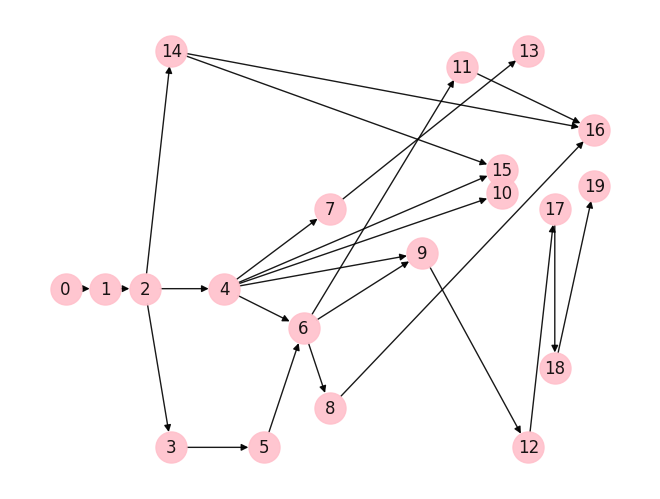

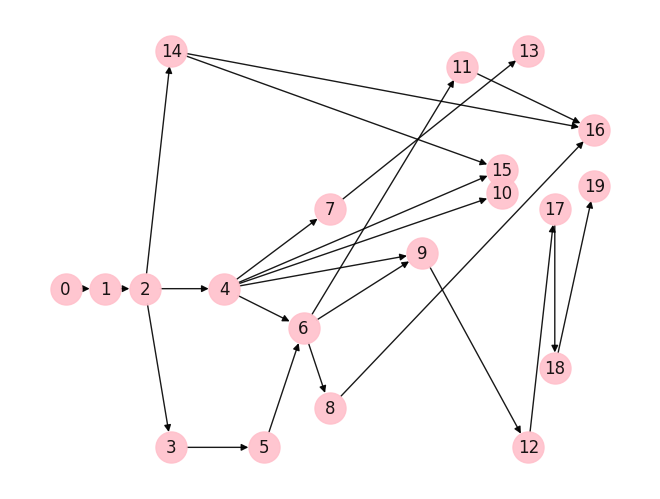

In [179]:
# On va essayer de tracer le graphe
# Import des libs
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Paramêtre des arcs
# Exemple : arcs = [['A', 'B'], ['B', 'C'], ['B', 'D']]

edges  = [[0, 1],  [1, 2], [2, 3], [2, 4], [2, 14], [3, 5], [4, 6], [4, 7], [4, 9], [4, 10], [4, 15],[5,6],
     [6, 8], [6, 9], [6, 11], [6, 11], [7, 13], [8, 16], [9, 12], [11, 16], [12, 17], [14, 15], [14, 16], [17, 18], [18, 19]]


# Graph orienté
G = nx.DiGraph() 

G.add_edges_from(edges)

position = nx.spring_layout(G)

# Position des nodes
position[0] = np.array([-3, 0])  # On spécifie la position du node de cette façon
position[1] = np.array([-2.7, 0])  # On spécifie la position du node de cette façon
position[2] = np.array([-2.4, 0])  # On spécifie la position du node de cette façon
position[3] = np.array([-2.2, -2])  # On spécifie la position du node de cette façon
position[4] = np.array([-1.8, 0])  # On spécifie la position du node de cette façon
position[5] = np.array([-1.5, -2])  # On spécifie la position du node de cette façon
position[6] = np.array([-1.2, -0.5])  # On spécifie la position du node de cette façon
position[7] = np.array([-1, 1])  # On spécifie la position du node de cette façon
position[8] = np.array([-1, -1.5])  # On spécifie la position du node de cette façon
position[11] = np.array([0, 2.8])  # On spécifie la position du node de cette façon
position[10] = np.array([0.3, 1.2])  # On spécifie la position du node de cette façon
position[12] = np.array([0.5, -2])  # On spécifie la position du node de cette façon
position[13] = np.array([0.5, 3])  # On spécifie la position du node de cette façon
position[14] = np.array([-2.2, 3])  # On spécifie la position du node de cette façon
position[15] = np.array([0.3, 1.5])  # On spécifie la position du node de cette façon
position[16] = np.array([1, 2])  # On spécifie la position du node de cette façon
position[17] = np.array([0.7, 1])  # On spécifie la position du node de cette façon
position[18] = np.array([0.7, -1])  # On spécifie la position du node de cette façon
position[19] = np.array([1, 1.3])  # On spécifie la position du node de cette façon

nx.draw(
    G,  edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    labels={node: node for node in G.nodes()},pos=position
)

plt.figure()
plt.axis('off')
plt.show()


Voilà, il ne me reste plus qu'à coder ceci en full stack dans mon app www.solvgraph.com , afin que cela devienne facile comme dans un jeu !